In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data using Pandas

In [6]:
df_init = pd.read_csv('../data/StudentsPerformance.csv')
df_init

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Descriptive statistics of Data

### Data types

Since data types dictate us how to transform our data, we need to know what data types we are dealing with. We can use the `info` attribute to get the data types of each column.

In [9]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We also need to check if there are any missing values in the dataset.

In [93]:
df_init.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
avg score                      0
dtype: int64

### Statistics

In [15]:
df_init.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The describe method gives us a lot of information about the data. For example, the data doesn't seem to be skewed when looking at the percentile

For easier analysis, create a new column that contains the average of all three scores

In [82]:
df_init['avg score'] = df_init[['math score', 'reading score', 'writing score']].mean(axis=1)

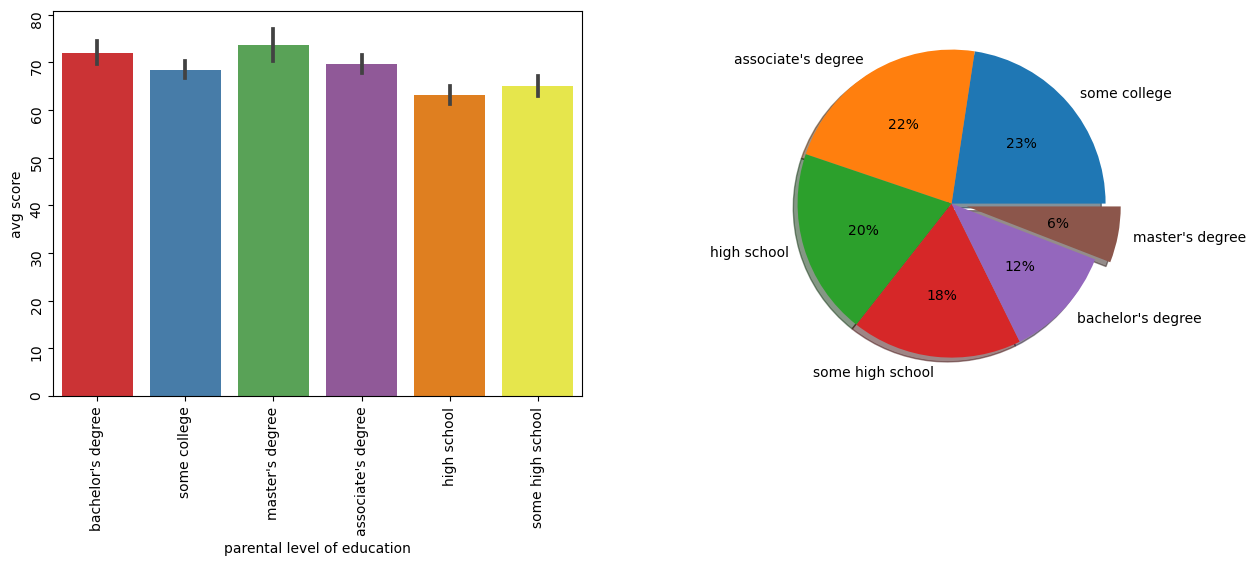

In [188]:
eduCount = df_init['parental level of education'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(data=df_init, x='parental level of education', y='avg score', palette='Set1', ax=ax[0]);
ax[0].tick_params(labelrotation=90)

plt.pie(eduCount, labels=eduCount.index.tolist(), autopct='%.0f%%', explode=[0,0,0,0,0,0.1], shadow=True);

Insights:
- Parents having master's degrees have the highest scoring children
- Parents having only passed high school have the lowest scoring children
- Most parents have an associate's degree


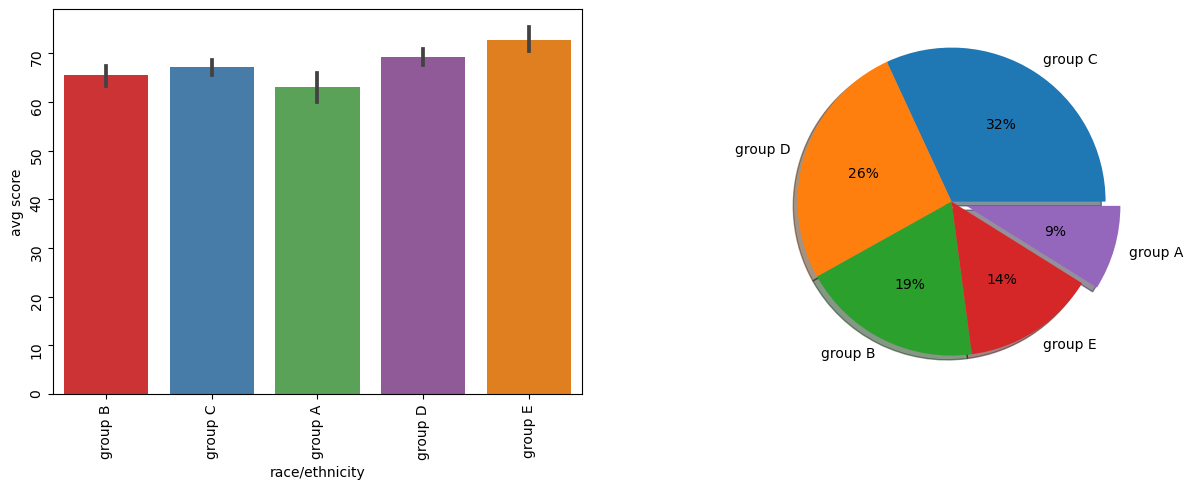

In [186]:
raceCount = df_init['race/ethnicity'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(data=df_init, x='race/ethnicity', y='avg score', palette='Set1', ax=ax[0]);
ax[0].tick_params(labelrotation=90)

plt.pie(raceCount, labels=raceCount.index.tolist(), autopct='%.0f%%', explode=[0,0,0,0,0.1], shadow=True);

Insights:
- Group E has the highest scoring students
- Group A has the lowest scoring students
- Group A is the minority among the other socioeconomic classes

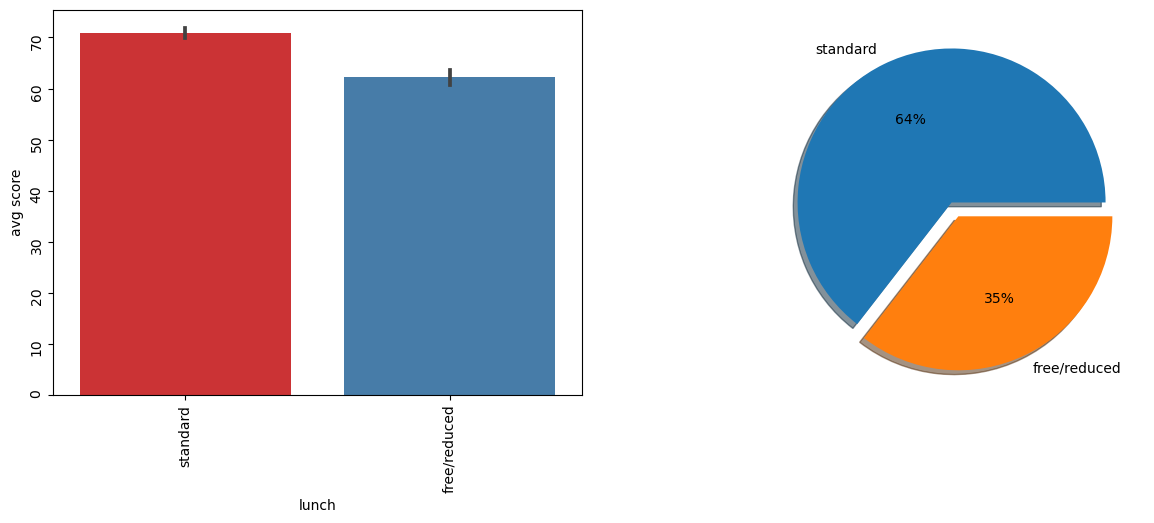

In [187]:
lunchCount = df_init['lunch'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(data=df_init, x='lunch', y='avg score', palette='Set1', ax=ax[0]);
ax[0].tick_params(labelrotation=90)

plt.pie(lunchCount, labels=lunchCount.index.tolist(), autopct='%.0f%%', explode=[0,0.1], shadow=True);

Insights:
- Students that have standard lunch scores higher than free or reduced lunch students.

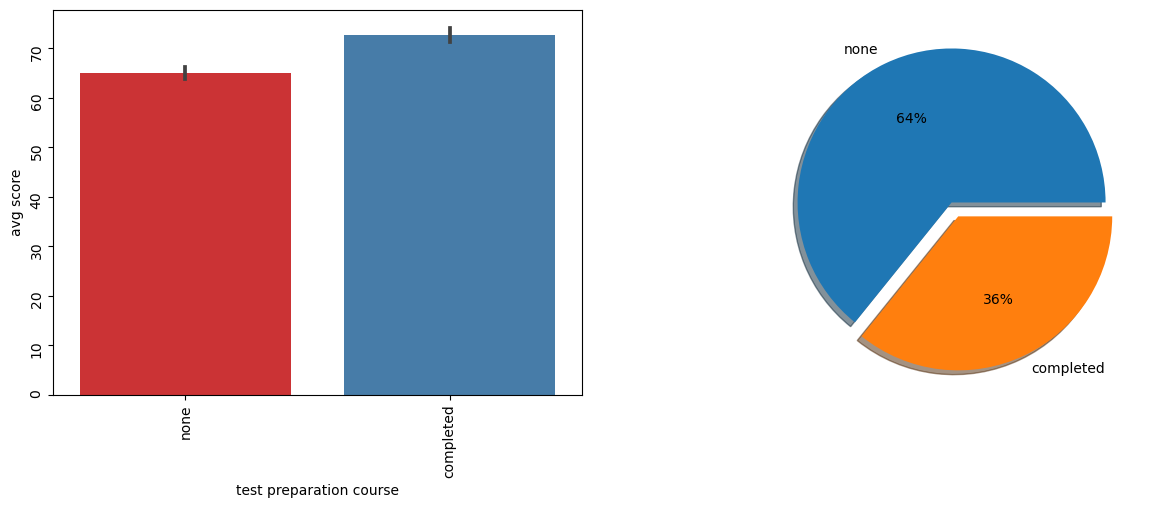

In [183]:
prepCount = df_init['test preparation course'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(data=df_init, x='test preparation course', y='avg score', palette='Set1', ax=ax[0]);
ax[0].tick_params(labelrotation=90)

plt.pie(prepCount, labels=prepCount.index.tolist(), autopct='%.0f%%', explode=[0,0.1], shadow=True);

Insights:
- Students that have completed test preparation courses have higher scores
- However, only few students have completed prep courses

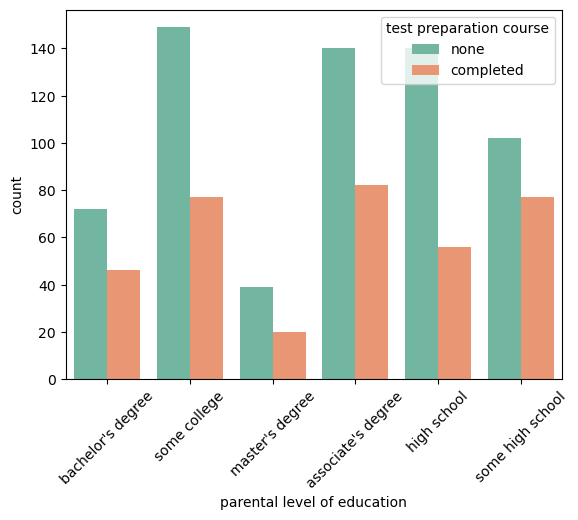

In [196]:
sns.countplot(data=df_init, x=df_init['parental level of education'], hue=df_init['test preparation course'], palette='Set2');
plt.xticks(rotation=45);

We see that the majority of the students across all parental education backgrounds do not take prep courses. This indicates that prep courses do not influence student's performance that much.

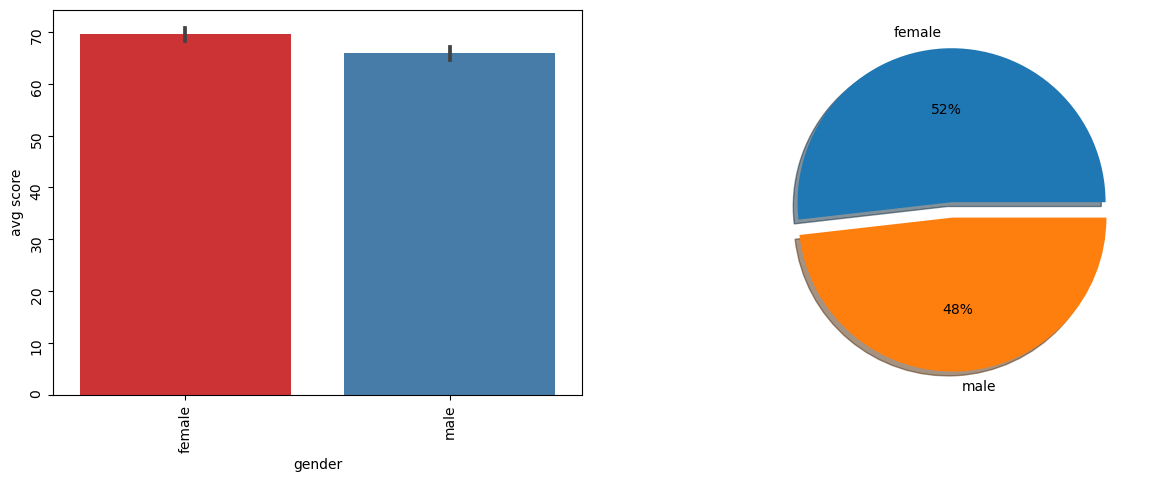

In [189]:
genderCount = df_init['gender'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(data=df_init, x='gender', y='avg score', palette='Set1', ax=ax[0]);
ax[0].tick_params(labelrotation=90)

plt.pie(genderCount, labels=genderCount.index.tolist(), autopct='%.0f%%', explode=[0,0.1], shadow=True);

Insights: 
- Female students have higher scores than male students

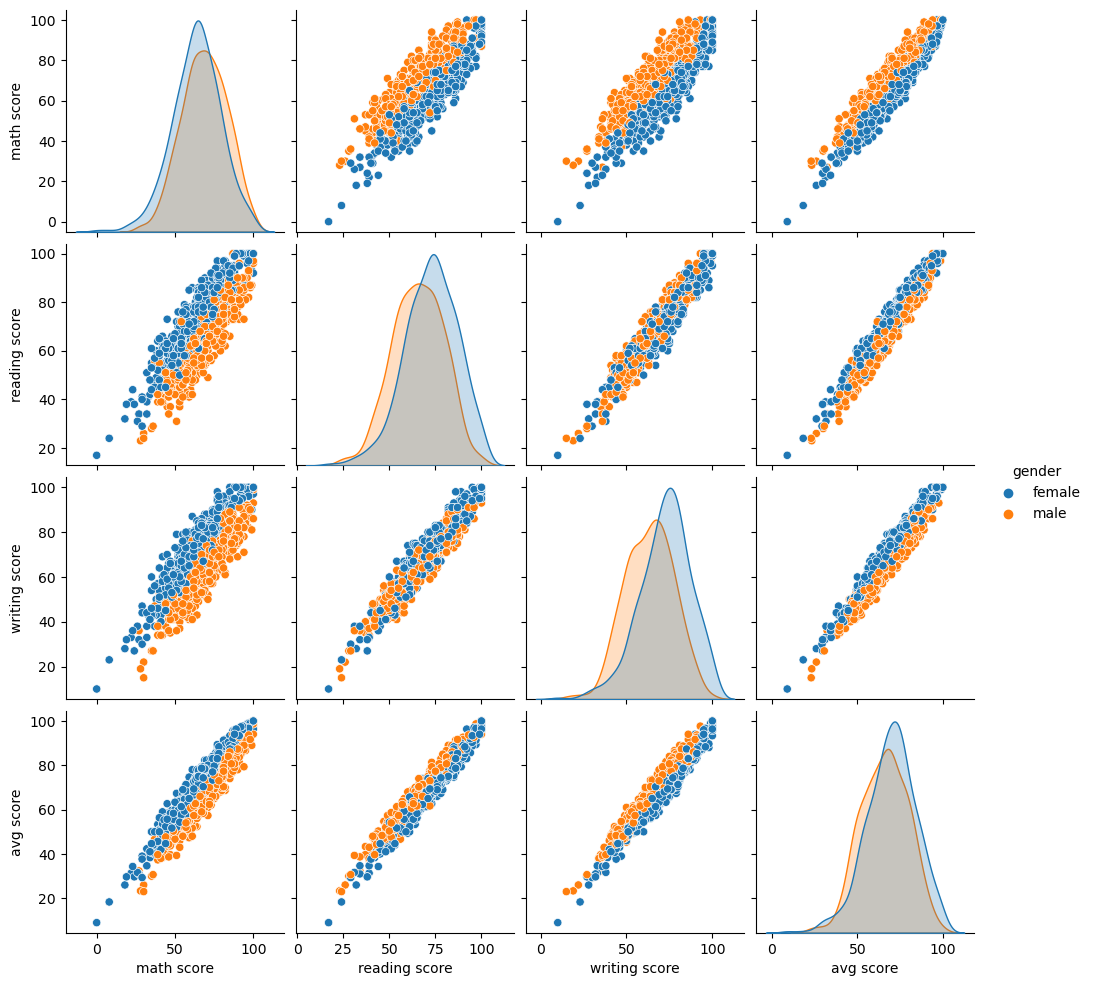

In [197]:
sns.pairplot(df_init, hue='gender')

## Conclusion
- Performance is linked with parental education, type of lunch, and race.
- Females score higher than males